### Tutorial PYACS/PYEQ: time dependent slip inversion from GNSS time series
author: Jean-Mathieu Nocquet

Geoazur, Université Côte d'Azur, IRD, CNRS, OCA

IPGP, University of Paris

date: 23/09/2021

nocquet@geoazur.unice.fr 23/09/2023

In [1]:
# import
import matplotlib.pyplot as plt
import pickle
from colors import red
import sys
import os
from pyacs.gts.Sgts import Sgts
import glob
import geopandas
import subprocess
import shutil
import os

In [2]:
# run everything for check
!cat ../run.sh
os.mkdir("geometry")
subprocess.call(["cd .. ; ./run.sh"], shell=True)

###############################################################################
# TUTORIAL TIME DEPENDENT SLIP INVERSION - MASTER FILE
# J.-M. NOCQUET - GEOAZUR, IRD, UNIV. COTE D AZUR, CNRS, OCA - VALBONNE - FRANCE
# CREATED 2021/09/07
# 
# THIS SCRIPT SUMMURIZES THE STEPS TO PERFORM A KINEMATIC INVERSION OF A SLOW
# SLIP EVENT THAT OCCURRED AT THE ECUADOR SUBDUCTION ZONE IN JUNE/JULY 2021
###############################################################################

# MAKE THE GEOMETRY FROM THE USGS SLAB2.0 SUBDUCTION INTERFACE MODEL
# THIS SCRIPT DISCRETIZES THE SUBDUCTION INTERFACE INTO TRIANGULAR DISLOCATION
# ELEMENTS

cd geometry
pyeq_parametrize_curve_surface_triangles.py -g ../slab2.0/sam_slab2_dep_02.23.18_shifted.grd -n 9 -d 0/35 -e ecuador -b /-83/-78/-2.2/-0.3

# MAKE THE GREEN'S FUNCTION

cd ../green
pyeq_make_green.py -gps_h ./gps_coo.dat -g ../geometry/ecuador_geometry.npy -type tde -method nikkhoo -e green_ecuador

# RUN THE MODEL
cd ../models
pyaks.py -conf pyaks_co

tde # 223: 84027 82384 84028 
tde # 224: 84030 84031 84032 
tde # 225: 13485 84030 84032 
tde # 226: 84030 82383 84031 
tde # 227: 84033 84034 84035 
tde # 228: 82383 84033 84035 
tde # 229: 84033 81990 84034 
tde # 230: 84039 84040 84041 
tde # 231: 81990 84039 84041 
tde # 233: 84090 84091 84092 
tde # 234: 82404 84090 84092 
tde # 235: 84090 82405 84091 
tde # 236: 84093 82404 84094 
tde # 237: 84096 84097 84098 
tde # 238: 82404 84096 84098 
tde # 239: 84096 13485 84097 
tde # 240: 84126 84127 84128 
tde # 241: 82416 84126 84128 
tde # 243: 84129 84130 84131 
tde # 244: 82002 84129 84131 
tde # 245: 84129 82416 84130 
tde # 246: 84135 84136 84137 
tde # 247: 82419 84135 84137 
tde # 248: 84135 82420 84136 
tde # 249: 84138 84139 84140 
tde # 250: 13485 84138 84140 
tde # 251: 84138 82419 84139 
tde # 252: 84141 84142 84143 
tde # 253: 82419 84141 84143 
tde # 254: 84141 82002 84142 
tde # 256: 84147 84148 84149 
tde # 257: 82002 84147 84149 
tde # 258: 84147 82422 84148 
[83040 835

[PYEQ] Loading model_quick_00.mpck (0.00 Gb) 
###############################################################################
[PYEQ] PRINTING RESULTS TO QUICK_00
###############################################################################
[PYEQ] all inversion results in: quick_00
[PYEQ] Loading quick_00/npy/model.mpck (0.00 Gb) 
[PYEQ] plotting time series
[PYEQ] Making map of GPS sites location: quick_00/plots/map/map.png


  0%|          | 0/23 [00:00<?, ?it/s]

[PYEQ] writing cumulative slip and slip rate GMT and shapefiles for visualization in QGIS
[PYEQ] writing spatial resolution map as shapefile
[PYEQ] writing GPS displacements GMT and shapefiles for visualization in QGIS
[PYEQ] plotting model
[PYEQ] plotting cumulative slip
[PYEQ] making plot for cumulative slip in quick_00/plots/model_cumulative 


100%|██████████| 23/23 [00:02<00:00, 10.52it/s]

[PYEQ] plotting slip direction
[PYEQ] plotting contour cumulative slip



  0%|          | 0/22 [00:00<?, ?it/s]

[PYEQ] making plot for slip rate in quick_00/plots/model_rate


100%|██████████| 22/22 [00:01<00:00, 20.00it/s]

[PYEQ] making plot for contour slip rate in quick_00/plots/model_rate_contour



100%|██████████| 22/22 [00:01<00:00, 12.11it/s]


[PYEQ] making plots for stf/cstf results in quick_00/plots/stf


0

In [3]:
# clean everything
shutil.rmtree(os.path.join("models", "quick_00"), ignore_errors=True)

shutil.rmtree("geometry")
os.mkdir("geometry")

files = (
    os.path.join("green", "green_ecuador_D0.npy"),
    os.path.join("green", "green_ecuador_Dm.npy"),
    os.path.join("green", "green_ecuador_input.npz"),
    os.path.join("models", "model_quick_00.mpck"), 
)

for f in files:
    if os.path.isfile(f):
        os.remove(f)

In [4]:
# now, step by step
# make the geometry from USGS slab2.0 model
cmd = 'cd ../geometry ; pyeq_parametrize_curve_surface_triangles.py -g ../slab2.0/sam_slab2_dep_02.23.18_shifted.grd -n 9 -d 0/35 -e ecuador -b /-83/-78/-2.2/-0.3'
subprocess.call(cmd, shell=True)

-- Number of vertices and faces of initial icosahedron  12 20
-- Number of divisions  9
-- Now doing subdivision...
   - Division iteration:  1 / 9
   - New Number of vertices and faces  72 80
   - New triangle edge distance : 3937.495 km
   - Division iteration:  2 / 9
   - New Number of vertices and faces  312 320
   - New triangle edge distance : 2046.646 km
   - Division iteration:  3 / 9
   - New Number of vertices and faces  1272 1280
   - New triangle edge distance : 1033.202 km
   - Division iteration:  4 / 9
   - New Number of vertices and faces  5112 5120
   - New triangle edge distance :  517.840 km
   - Division iteration:  5 / 9
   - New Number of vertices and faces  20472 20480
   - New triangle edge distance :  259.075 km
   - Division iteration:  6 / 9
   - New Number of vertices and faces  81912 81920
   - New triangle edge distance :  129.557 km
-- Now doing selection on bounds  /-83/-78/-2.2/-0.3
-- Keeping  39  faces
-- Now dealing with finer subdivisions
   - Divis

tde # 223: 84027 82384 84028 
tde # 224: 84030 84031 84032 
tde # 225: 13485 84030 84032 
tde # 226: 84030 82383 84031 
tde # 227: 84033 84034 84035 
tde # 228: 82383 84033 84035 
tde # 229: 84033 81990 84034 
tde # 230: 84039 84040 84041 
tde # 231: 81990 84039 84041 
tde # 233: 84090 84091 84092 
tde # 234: 82404 84090 84092 
tde # 235: 84090 82405 84091 
tde # 236: 84093 82404 84094 
tde # 237: 84096 84097 84098 
tde # 238: 82404 84096 84098 
tde # 239: 84096 13485 84097 
tde # 240: 84126 84127 84128 
tde # 241: 82416 84126 84128 
tde # 243: 84129 84130 84131 
tde # 244: 82002 84129 84131 
tde # 245: 84129 82416 84130 
tde # 246: 84135 84136 84137 
tde # 247: 82419 84135 84137 
tde # 248: 84135 82420 84136 
tde # 249: 84138 84139 84140 
tde # 250: 13485 84138 84140 
tde # 251: 84138 82419 84139 
tde # 252: 84141 84142 84143 
tde # 253: 82419 84141 84143 
tde # 254: 84141 82002 84142 
tde # 256: 84147 84148 84149 
tde # 257: 82002 84147 84149 
tde # 258: 84147 82422 84148 
[83040 835

0

In [5]:
# check the geometry files
!ls ../geometry

ecuador_dislocations.dat  ecuador_rectangular_dislocations.gmt
ecuador_geometry.dat	  ecuador_sources_lp.dat
ecuador_geometry.npy	  ecuador_tde.dbf
ecuador_rde.dbf		  ecuador_tde.gmt
ecuador_rde.gmt		  ecuador_tde.prj
ecuador_rde.prj		  ecuador_tde.shp
ecuador_rde.shp		  ecuador_tde.shx
ecuador_rde.shx		  ecuador_triangles.dat


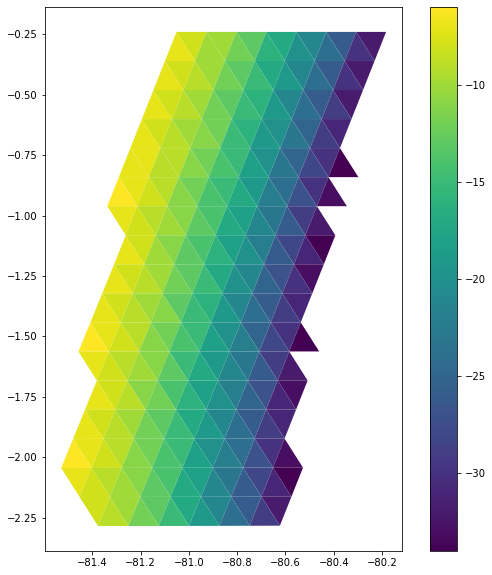

In [6]:
# plot the geometry
geometry_shp = '../geometry/ecuador_tde.shp'
geometry =  geopandas.read_file( geometry_shp )
geometry.plot( column='depth_top_',legend=True , figsize=(10,10))

In [7]:
# check the main file including the geometry
!cat ../geometry/ecuador_geometry.dat

#     rdis_long    rdis_lat rdis_depth rdis_length rdis_width  rdis_area ratio_rdis_tdis    strike        dip centroid_long centroid_lat centroid_depth tdis_long1  tdis_lat1 tdis_depth1 tdis_long2  tdis_lat2 tdis_depth2 tdis_long3  tdis_lat3 tdis_depth3  tdis_area
0000  -80.29347   -0.30787      -32.65        9.76       9.76     95.21            1.05     20.26      25.12     -80.24091     -0.28042         -32.63  -80.23142   -0.36054      -34.59  -80.18371   -0.24036      -34.77  -80.30761   -0.24036      -28.73    100.17 
0001  -80.41790   -0.30810      -26.84        9.76       9.76     95.21            1.03     19.70      22.33     -80.36481     -0.28042         -26.82  -80.35532   -0.36054      -28.52  -80.30761   -0.24036      -28.73  -80.43151   -0.24036      -23.42     98.24 
0002  -80.54231   -0.30832      -21.76        9.76       9.76     95.21            1.01     19.17      19.39     -80.48871     -0.28042         -21.74  -80.43151   -0.24036      -23.42  -80.55541   -0.24036 

In [8]:
# check the location of GPS sites
!ls ../green
# create a shapefile for plot
cmd = 'cd ../green ; pyacs_qgis_psvelo_2_shapefile.py -gmt gps_coo.dat'
subprocess.call(cmd, shell=True)
!ls ../green

gps_coo.dat	      green_ecuador_Dm.npy
green_ecuador_D0.npy  green_ecuador_input.npz
gps_coo.dat  gps_coo.prj  gps_coo.shx		green_ecuador_Dm.npy
gps_coo.dbf  gps_coo.shp  green_ecuador_D0.npy	green_ecuador_input.npz


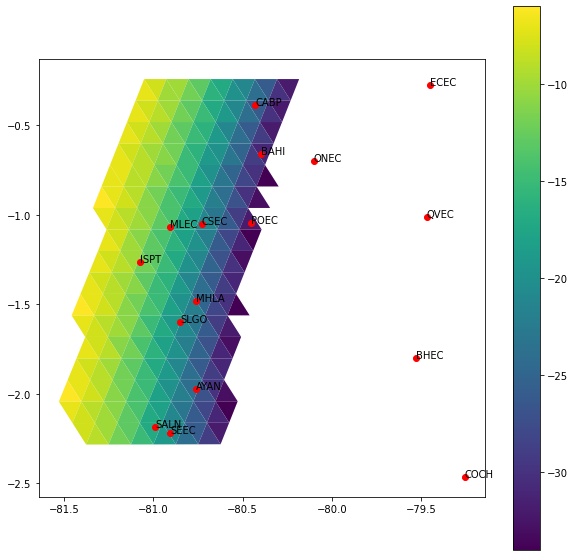

In [9]:
# make a map with the fault and gps sites
ax = geometry.plot( column='depth_top_',legend=True , figsize=(10,10))
gps = geopandas.read_file('../green/gps_coo.shp')
gps.plot(c='red', ax=ax)
# add the names
for i,row in gps.iterrows():
    ax.text(float(gps.longitude[i]),float(gps.latitude[i]),gps.name[i])

In [10]:
# have a look at the time series
# load the time series
dir_ts = '../data'
ts = Sgts( dir_ts )

-- Reading directory:  ../data
-- Sgts read from PYACS pck file: ../data/central_ecuador_ts.pck
-- No pride pos files found
-- No pride_files found
-- No mb_files found
-- No tdp_files found
-- No kenv file found
-- No cats file found
-- No Gamit/Globk pos file found
-- No pyacs t_xyz file found
-- No Gamit/Globk track NEU file found
-- adding  AYAN
-- adding  BAHI
-- adding  BHEC
-- adding  CABP
-- adding  COCH
-- adding  CSEC
-- adding  ECEC
-- adding  ISPT
-- adding  MHLA
-- adding  MLEC
-- adding  ONEC
-- adding  POEC
-- adding  QVEC
-- adding  SALN
-- adding  SEEC
-- adding  SLGO
-- read  16  time series in directory  ../data


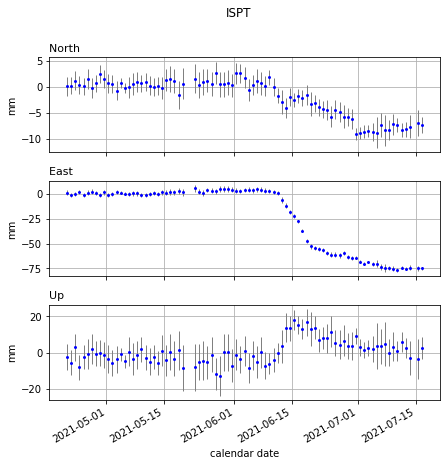

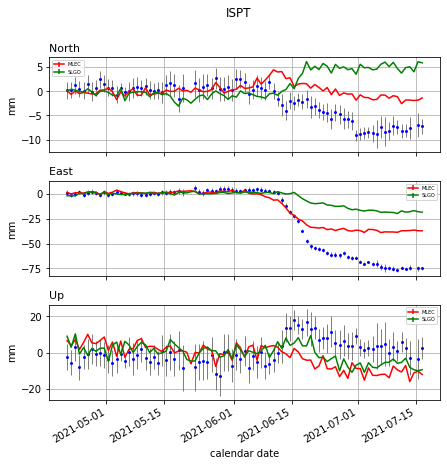

In [11]:
# plot a given site
ts.ISPT.plot()
# superimpose time series
ts.ISPT.plot(superimposed=[ts.MLEC,ts.SLGO], legend=True)

In [12]:
# make the green tensor
cmd = 'cd ../green ; pyeq_make_green.py -gps_h ./gps_coo.dat -g ../geometry/ecuador_geometry.npy -type tde -method nikkhoo -e green_ecuador'
subprocess.call(cmd, shell=True)

[PYEQ] verbose mode: WARNING
[PYEQ] Loading ../geometry/ecuador_geometry.npy
[PYEQ] Number of subfaults: 242
[PYEQ] Reading horizontal observation coordinates ./gps_coo.dat
[PYEQ] Number of horizontal observations: 16
[PYEQ] Creating Green tensor for GPS horizontal components
[PYEQ] calculating displacement Green TDE tensor using Nikkhoo
[PYEQ] Now calculating the distance matrices
[PYEQ] Creating the absolute Distance matrix green_ecuador_D0.npy
[PYEQ] Saving the inversion structured array green_ecuador_input.npz 


0

In [13]:
# check the green files
!ls ../green

gps_coo.dat  gps_coo.prj  gps_coo.shx		green_ecuador_Dm.npy
gps_coo.dbf  gps_coo.shp  green_ecuador_D0.npy	green_ecuador_input.npz


In [14]:
# edit the driver file ../models/pyaks_conf_quick_00.dat

In [15]:
# runs the inversion
cmd = 'cd ../models ; pyaks.py -conf pyaks_conf_quick_00.dat'
subprocess.call(cmd, shell=True)

###############################################################################
[PYEQ] STARTING PYEQ
###############################################################################
[PYEQ] reading conf file pyaks_conf_quick_00.dat
[PYEQ WARNING] option plot not provided. Set to False.
[PYEQ WARNING] option tar not provided. Set to False.
[PYEQ WARNING] option mpck not provided. Set to None.
[PYEQ WARNING] option geometry_range_lon not provided. Set to None
[PYEQ WARNING] option geometry_range_lat not provided. Set to None
[PYEQ WARNING] option geometry_range_depth not provided. Set to None
[PYEQ WARNING] option geometry_remove_idx not provided. Set to None
[PYEQ] verbose mode: VERBOSE
[PYEQ] Collecting system information
###############################################################################
[PYEQ] READING INPUT GEOMETRY AND GREEN TENSOR FROM INPUT_NPZ
###############################################################################
[PYEQ] Reading input file: ../green/green_ecuado

0

In [16]:
# check model has been created
!ls -alh ../models

total 1.2M
drwxr-xr-x  3 1000 1000 4.0K Sep 23 20:50 .
drwxr-xr-x  9 1000 1000 4.0K Sep 23 15:36 ..
-rwxr-xr-x  1 1000 1000  838 Sep  8 09:27 conf_plot_custom.dat
-rw-r--r--  1 root root 1.2M Sep 23 20:50 model_quick_00.mpck
-rwxr-xr-x  1 1000 1000 3.3K Sep  8 09:27 pyaks_conf_quick_00.dat
drwxr-xr-x 15 root root 4.0K Sep 23 20:46 quick_00


In [17]:
# convert binary file to output test files
cmd = 'cd ../models ; pyek_print_result_from_mpck.py -mpck model_quick_00.mpck'
subprocess.call(cmd, shell=True)

[PYEQ] Loading model_quick_00.mpck (0.00 Gb) 
###############################################################################
[PYEQ] PRINTING RESULTS TO QUICK_00
###############################################################################
[PYEQ] all inversion results in: quick_00


0

In [18]:
# check output
!ls ../models/quick_00

conf	      gmt   npy    shapefile  slip_time_series	stf	 time_series
displacement  info  plots  slip       stats		summary


In [19]:
# make automatic plots
cmd = 'cd ../models ; pyeq_plot_kinematics_shp.py -odir quick_00 -conf conf_plot_custom.dat'
subprocess.call(cmd, shell=True)

[PYEQ] Loading quick_00/npy/model.mpck (0.00 Gb) 
[PYEQ] plotting time series
[PYEQ] Making map of GPS sites location: quick_00/plots/map/map.png


100%|██████████| 16/16 [00:00<00:00, 169.96it/s]

[PYEQ] writing cumulative slip and slip rate GMT and shapefiles for visualization in QGIS
[PYEQ] writing spatial resolution map as shapefile
[PYEQ] writing GPS displacements GMT and shapefiles for visualization in QGIS
[PYEQ] plotting model
[PYEQ] plotting cumulative slip
[PYEQ] making plot for cumulative slip in quick_00/plots/model_cumulative 



  0%|          | 0/23 [00:00<?, ?it/s]

[PYEQ] plotting slip direction
[PYEQ] plotting contour cumulative slip


  0%|          | 0/22 [00:00<?, ?it/s]

[PYEQ] making plot for slip rate in quick_00/plots/model_rate


100%|██████████| 22/22 [00:01<00:00, 15.76it/s]

[PYEQ] making plot for contour slip rate in quick_00/plots/model_rate_contour



100%|██████████| 22/22 [00:02<00:00,  9.86it/s]

[PYEQ] making plots for stf/cstf results in quick_00/plots/stf


0

In [ ]:
# have a look at the plots in ../models/quick_00/plots

## From here, we do things manually

In [20]:
# list of inversion result directories
linv = ['../models/quick_00']

In [21]:
# loads the models
lmodel = []
for inv in linv:
    pck = inv+'/npy/model.mpck'

    print("-- Loading %s (%.2f Gb) " % ( pck , os.path.getsize( pck ) /1024 / 1024 / 1024 ) )
    with open( pck, "rb") as f:
        lmodel.append( pickle.load( f ) )
    f.close()


-- Loading ../models/quick_00/npy/model.mpck (0.00 Gb) 


Text(0, 0.5, 'Moment rate (N.m)')

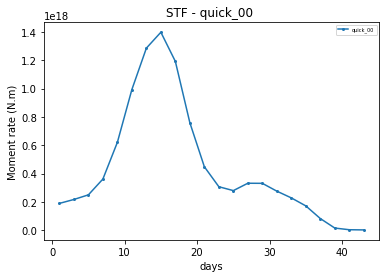

In [22]:
# compare STF
for i,model in enumerate(lmodel):
    plt.plot( model.np_mid_model_delta_d , model.STF , '-o' , markersize=2,label=linv[i].split('/')[-1])

plt.legend()
plt.title( ("STF - %s " % model.name ) )
plt.xlabel('days')
plt.ylabel('Moment rate (N.m)')    

Text(0, 0.5, 'Cumulated Moment (N.m)')

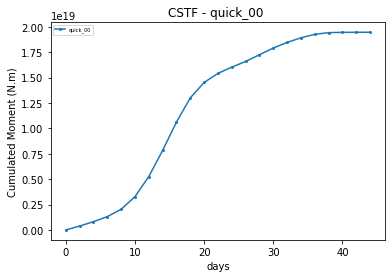

In [23]:
# compare CSTF
for i,model in enumerate(lmodel):
    plt.plot( model.np_model_delta_d , model.CSTF , '-o' , markersize=2,label=linv[i].split('/')[-1])

plt.legend()
plt.title( ("CSTF - %s " % model.name ) )
plt.xlabel('days')
plt.ylabel('Cumulated Moment (N.m)')    

/root/miniconda3/lib/python3.7/site-packages/pyacs/lib/glinalg.py:266: RuntimeWarning: invalid value encountered in true_divide
  correlation = Cov / outer_v


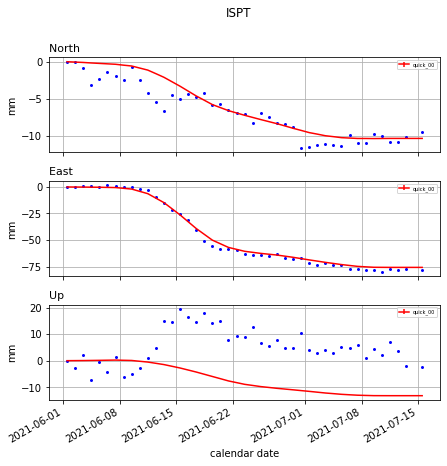

In [24]:
# compare model prediction for a given site
code = 'ISPT'
obs = Sgts(linv[0]+'/time_series/obs',verbose=False)
lmodel_gts = []
# load the modeled time series
for inv in linv:
    lmodel_gts.append( Sgts(inv+'/time_series/model_all_dates',verbose=False) )
# select time series
lts = []
for i,ts in enumerate(lmodel_gts):
    
    wts = ts.__dict__[code]
    wts.code = linv[i].split('/')[-1]
    lts.append( wts )
# make plot
obs.__dict__[code].plot(superimposed=lts,center=False,legend=True)

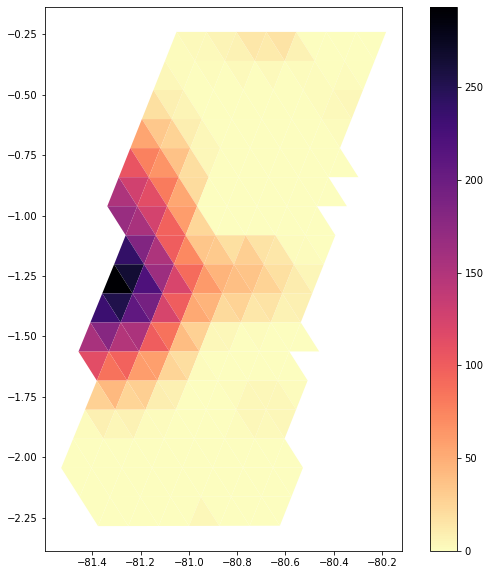

In [25]:
# plot several cumulative slip models at the final date
for inv in linv:
    shp = sorted(glob.glob(inv+'/shapefile/slip_cumulative/*_cumulative_slip*.shp'))[-1]
    model =  geopandas.read_file( shp )
    model.plot( column='slip',legend=True , figsize=(10,10) , cmap='magma_r')

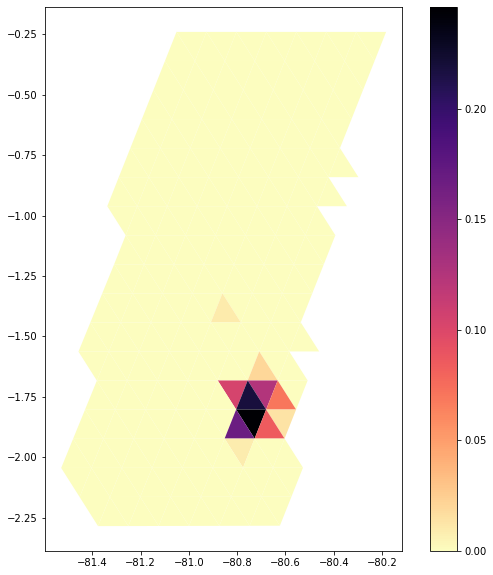

In [26]:
# plot several slip rate models at the final date
for inv in linv:
    shp = sorted(glob.glob(inv+'/shapefile/slip_rate/*_slip_rate*.shp'))[20]
    model =  geopandas.read_file( shp )
    model.plot( column='slip',legend=True , figsize=(10,10) , cmap='magma_r')